**<font size='6' color='red'>ch11. N차원 배열 나누기 </font>**

# 4절 복사와 뷰

## 4.1 모두 복사안함(스칼라 변수만 제외)

In [5]:
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [6]:
a.shape,type(a),a.ndim

((12,), numpy.ndarray, 1)

In [7]:
b=a #a와 b는 같은 너파이배열 객체이지만 이름만 다름(복사가 안됨)

In [8]:
b is a 

True

In [9]:
b.shape,b.ndim

((12,), 1)

In [10]:
b.shape=3,4
b.shape,b.ndim

((3, 4), 2)

In [11]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [12]:
id(a),id(b)

(2159514241664, 2159514241664)

In [13]:
def f(data):
    print(id(data))

## 4.2 얕은 복사: 뷰(view)
- 복사를 해도 주소값이 같기떄문에 할당한 원본배열의 값이 변화할수있습니다
- 하지만 shape에서만 바뀜

In [14]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [15]:
c = a.view()
c is a

False

In [16]:
b=a
b is a

True

In [17]:
c.flags.owndata # c가 메모리를 집접 소유하지는 않음

False

In [18]:
a.flags.owndata 

True

In [19]:
c

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [20]:
c.shape,c.ndim

((3, 4), 2)

In [21]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [22]:
c.shape=(2,6)

In [23]:
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [24]:
c[:,2]=999 #2데신 999,8디산 999

In [25]:
c  

array([[  0,   1, 999,   3,   4,   5],
       [  6,   7, 999,   9,  10,  11]])

In [26]:
a

array([[  0,   1, 999,   3],
       [  4,   5,   6,   7],
       [999,   9,  10,  11]])

In [27]:
a = np.arange(12).reshape(3,4)
s = a[:,1:3] #슬라이싱 될떄 뷰가 반환됨 
print(a)
print(s)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 1  2]
 [ 5  6]
 [ 9 10]]


In [28]:
s[:,0]=99 #1대신99,5대신 99 ,9대신 00

In [29]:
s

array([[99,  2],
       [99,  6],
       [99, 10]])

In [30]:
a

array([[ 0, 99,  2,  3],
       [ 4, 99,  6,  7],
       [ 8, 99, 10, 11]])

## 4.3 깊은 복사; copy

In [31]:
a=np.arange(12).reshape(3,4)

In [32]:
d=a.copy()

In [33]:
d is a 

False

In [34]:
d.flags.owndata # d객체가 메모리를 직접 소유

True

In [35]:
d.base is a # d와 a는 어떤것도 공유하지 않고 소유

False

In [36]:
d.shape=(2,6)

In [37]:
d

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [38]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [39]:
#d[0,...]=[99,99,99,99]
#d[0]=[99,99,99,99]
d[0]=99

In [40]:
d

array([[99, 99, 99, 99, 99, 99],
       [ 6,  7,  8,  9, 10, 11]])

In [41]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

# 5절. 고급 인덱싱
## 5.1 인덱스 배열로 인덱싱

In [42]:
a=np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121],
      dtype=int32)

In [43]:
i=np.array([1,1,3,8,5])
a[i]

array([ 1,  1,  9, 64, 25], dtype=int32)

In [44]:
l=[1,1,3,8,5]
a[l]

array([ 1,  1,  9, 64, 25], dtype=int32)

In [45]:
j = np.array([[3,4],
              [9,7]])

In [46]:
a[j] #2차원배열로 나옵니다

array([[ 9, 16],
       [81, 49]], dtype=int32)

In [47]:
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121],
      dtype=int32)

** 인덱스의 단일 배열은 첫번쨰 차원 참조(pt 49) **

In [48]:
import numpy as np

In [49]:
palette = np.array([[0,0,0],
                  [255,0,0],
                  [0,255,0],
                  [0,0,255],
                  [255,255,255]])
palette

array([[  0,   0,   0],
       [255,   0,   0],
       [  0, 255,   0],
       [  0,   0, 255],
       [255, 255, 255]])

In [50]:
image_index=np.array([[4,4,4,0,0,0,0,4,4,4],
                    [4,0,0,4,4,4,4,0,0,4],
                    [0,0,4,4,4,4,4,4,0,0],
                    [0,4,4,1,4,4,3,4,4,0],
                    [0,4,4,1,4,4,3,4,4,0],
                    [0,4,4,4,4,4,4,4,4,0],
                    [0,4,4,2,4,4,2,4,4,0],
                    [4,0,4,4,2,2,4,4,0,4],
                    [4,4,0,4,4,4,4,0,4,4],
                    [4,4,4,0,0,0,0,4,4,4]])

In [51]:
image_data=palette[image_index]

In [52]:
image_data.shape

(10, 10, 3)

In [53]:
# %matplotlib inline 쥬피터노트북을 실행한 브라우저에서 그림을 바로 볼 수 있게!

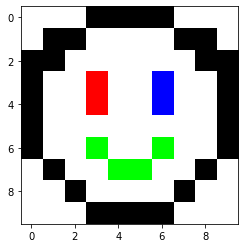

In [54]:
from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(image_data,interpolation='nearest')#interpolation='nearest'선형 보간법  주변의 알고 있는 값들을 이용하여 활용
plt.show()

In [55]:
# tensorflow 패키지 install 

In [56]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [57]:
import tensorflow.keras.datasets.mnist as mnist
mnist = mnist.load_data()
mnist[0][0].shape

(60000, 28, 28)

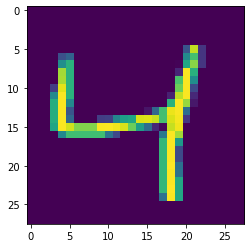

In [58]:
mnist_data = mnist[0][0]
import matplotlib.pyplot as plt
plt.imshow(mnist_data[2])

In [59]:
mnist_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## 5.2 다차원 인덱싱

In [60]:
import numpy as np 
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [61]:
i=np.array([[0,1],
          [1,2]])
j=np.array([[2,1],
          [3,3]])
print(i)
print(j)

[[0 1]
 [1 2]]
[[2 1]
 [3 3]]


In [62]:
a[i,j]

array([[ 2,  5],
       [ 7, 11]])

In [63]:
a[i] #행만 기입하면 열은 모든 열을 의미

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

In [64]:
a[i].shape#[2면 2행 4열]

(2, 2, 4)

In [65]:
a[i,...]

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

# 참고


In [66]:
a[i,]==a[i]

array([[[ True,  True,  True,  True],
        [ True,  True,  True,  True]],

       [[ True,  True,  True,  True],
        [ True,  True,  True,  True]]])

In [67]:
np.all(a[i,]==a[i])#모든 요소가 True 일 떄만 True

True

In [68]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [69]:
i

array([[0, 1],
       [1, 2]])

In [70]:
a[i, np.array([[2,2],[2,2]])]# 0행 2열, 1행 2열
                            # 1행 2열, 2행 2열

array([[ 2,  6],
       [ 6, 10]])

In [71]:
a[i,2]

array([[ 2,  6],
       [ 6, 10]])

## 5.3 argmax ; 최대값이 있는 곳의 인덱스

In [72]:
data = np.sin(np.arange(20)).reshape(5,4)
data

array([[ 0.        ,  0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ,  0.6569866 ],
       [ 0.98935825,  0.41211849, -0.54402111, -0.99999021],
       [-0.53657292,  0.42016704,  0.99060736,  0.65028784],
       [-0.28790332, -0.96139749, -0.75098725,  0.14987721]])

In [73]:
data.shape

(5, 4)

In [74]:
range(4)

range(0, 4)

In [75]:
ind = data.argmax(axis=0) #각 열에서 큰값이 있는 index
ind

array([2, 0, 3, 1], dtype=int64)

In [76]:
data_col_max=data[ind,range(data.shape[1])]
data_col_max

array([0.98935825, 0.84147098, 0.99060736, 0.6569866 ])

In [77]:
for i, item in enumerate(data_col_max):
    print("{}번쨰 열의 최대값은 {:.5f}".format(i,item))

0번쨰 열의 최대값은 0.98936
1번쨰 열의 최대값은 0.84147
2번쨰 열의 최대값은 0.99061
3번쨰 열의 최대값은 0.65699


In [78]:
data.max(axis=0)

array([0.98935825, 0.84147098, 0.99060736, 0.6569866 ])

In [79]:
np.all(data.max(axis=0)==data_col_max)

True

In [80]:
#행마다 최대값을 출력하기 (argmax함수를 이용)

In [81]:
ind=data.argmax(axis=1) #행마다 최대값을 출력하는것 ! 
ind

array([2, 3, 0, 2, 3], dtype=int64)

In [82]:
data_row_max=data[range(data.shape[0]),ind]
data_row_max

array([0.90929743, 0.6569866 , 0.98935825, 0.99060736, 0.14987721])

In [83]:
for i, item in enumerate(data_row_max):
    print("{}번쨰 행의 최대값은 {:.5f}".format(i,item))

0번쨰 행의 최대값은 0.90930
1번쨰 행의 최대값은 0.65699
2번쨰 행의 최대값은 0.98936
3번쨰 행의 최대값은 0.99061
4번쨰 행의 최대값은 0.14988


## 5.3 인덱싱을 이용한 값 변경

In [84]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [85]:
a[[1,3,4]]=0#이것은 a의 인덱스의 1번째 3번쨰 4번쨰의 수를 바꾼다  #a[1,3,4] 1면 3행 4열이고
a

array([0, 0, 2, 0, 0])

In [86]:
a = np.arange(5)
a[[0,0,2]]=[99,999,999]
a

array([999,   1, 999,   3,   4])

In [87]:
a=np.arange(5)
print("변경전:",a )
a[[0,0,2]]+=1 #인덱스가 중복됬을 경우에는 뒤에있는 부분에만 +1을 합니다.! 
print("변경후:",a)

변경전: [0 1 2 3 4]
변경후: [1 1 3 3 4]


## 5.4 논리 배열을 이용한 인덱싱

In [1]:
import numpy as np

In [2]:
a = np.arange(20).reshape(4,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [3]:
b=a%2==0
b

array([[ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [False,  True, False,  True, False]])

In [4]:
a[b]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [5]:
a[b]=a[b]**2

In [6]:
a[b]

array([  0,   4,  16,  36,  64, 100, 144, 196, 256, 324])

In [7]:
a

array([[  0,   1,   4,   3,  16],
       [  5,  36,   7,  64,   9],
       [100,  11, 144,  13, 196],
       [ 15, 256,  17, 324,  19]])

## 5.5 ix_()함수
- N개의 1차원 스퀀스 배열을 입력받아 N차원 N개를 반환

In [20]:
a = np.array([1,2,3,4])
b = np.array([11,12,13])
np.ix_(a,b)

(array([[1],
        [2],
        [3],
        [4]]),
 array([[11, 12, 13]]))

In [22]:
b.shape,b.ndim

((3,), 1)

In [10]:
ax, bx = np.ix_(a,b)

In [17]:
print(ax)
print(bx)

[[1]
 [2]
 [3]
 [4]]
[[11 12 13]]


In [19]:
ax.shape, ax.ndim

((4, 1), 2)

In [18]:
bx.shape, bx.ndim

((1, 3), 2)

In [23]:
r=np.add(ax,bx)
r

array([[12, 13, 14],
       [13, 14, 15],
       [14, 15, 16],
       [15, 16, 17]])

In [24]:
print(a[1]+b[2])
print(r[1,2])

15
15


# 6절 선형 대수
- 2차원 넘파이 배열을 행열
    - 행렬곱 : @ 또는 np.dot()
    - 역행렬 : np.linalg.inv(x)
    - 전치행렬 : x.T,x.tanspose()  #정행렬이 아닐경우 전치행렬을 곱해주고 그다음 역행렬을 곱해준다
    - nxn 단위행렬: np.eye(n) #n차원 단위행렬 
    - 대각합 : np.trace(x)
    - 연립방정식 해 풀기 : np.linalg.solve(a,b)

## 6.1 선형 연립 방정식 풀이(회귀도출); 독립변수2개 데이터 2개

In [34]:
# a의 역행렬 @ a가 단위행렬인지 확인 
g= np.array([[2,2],[2,2]])

In [40]:
np.all(np.eye(2)@ a == a)


True

In [41]:
np.all(a@np.eye(2) == a)


True

In [25]:
a= np.array([[1,2],
           [3,4]])#독립변수
a

array([[1, 2],
       [3, 4]])

In [28]:
y = np.array([[5],[7]]) #종속변수
y

array([[5],
       [7]])

** a @ X = y** <br>
x에는 두변수사이의 기울기가 있습니다.**<br>
** a의 역행렬 @ a @ x = a의역행렬 @ y ** <br>
** X = a의 역행렬 @y **

In [42]:
X = np.linalg.inv(a)@ y
X

array([[-3.],
       [ 4.]])

In [43]:
# 독립변수가 2,3일 경우 종속변수 값은?
2*X[0]+3*X[1]

array([6.])

# 6.2 선형 연립 방정식(회귀 도출)과 그래프 ; 독립변수1개

# 정방행렬을 위해 데이터2

In [59]:
x=[2,3]
y=[6.8,7.3]

In [49]:
# 2 1
# 3 1 ones 와 컬럼스텝
A = np.column_stack((np.array(x),np.ones(len(x)))) #독립변수
A

array([[2., 1.],
       [3., 1.]])

In [48]:
np.ones(len(x))

array([1., 1.])

In [53]:
Y = np.array(y).reshape(2,1)#
Y

array([[6.8],
       [7.3]])

In [ ]:
**A@X = Y *
** A의 역행렬 @ A @ X = A의 역행렬 @ Y

In [55]:
X=np.linalg.inv(A)@Y
X

array([[0.5],
       [5.8]])

In [57]:
# 연립방정식 해법을 귀하는 방식
np.linalg.solve(A,Y)

array([[0.5],
       [5.8]])

In [63]:
f = A[:,0]*X[0]+X[1] # 도출된 회귀식 
f

array([6.8, 7.3])

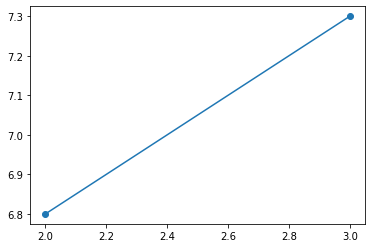

In [65]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
#plt.plot(x,y,'-')
plt.plot(A[:,0],f,'-')
plt.show()

**데이터를 n개** 

In [66]:
x = [32,64,96,118,216,114,152,158] #독립변수
y = [18,24,61.5,49,52,105,130,125] #종속변수

In [70]:
A = np.column_stack((x,np.ones(len(x))))
print(A) #독립변수 행렬
B = np.array(y).reshape(len(y),1)
print(B) #종속변수 행렬 

[[ 32.   1.]
 [ 64.   1.]
 [ 96.   1.]
 [118.   1.]
 [216.   1.]
 [114.   1.]
 [152.   1.]
 [158.   1.]]
[[ 18. ]
 [ 24. ]
 [ 61.5]
 [ 49. ]
 [ 52. ]
 [105. ]
 [130. ]
 [125. ]]


 - 역행렬 : np.linalg.inv(x)
    - 전치행렬 : x.T,x.tanspose()<br>
   A@X = B<br>
   A.T@A@X=A.T@B<br>
   (A.T@A)의 역행렬@(A.T@A)@X =(A.T@A)의 역행렬@A.T@B
   X=(A.T@A)역행렬 @ A.T@B
   

In [71]:
X=np.linalg.inv(A.T@A)@A.T@B
X

array([[ 0.40900507],
       [21.99314773]])

In [72]:
#np.linalg.solve(A,B) 불가 A가 정행렬일경우 가능 

LinAlgError: Last 2 dimensions of the array must be square

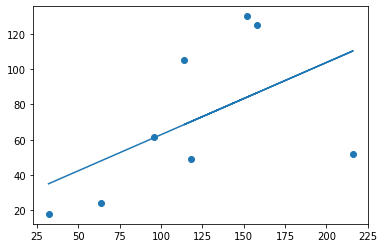

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(A[:,0],A[:,0]*X[0]+X[1],'-')
plt.show()

# 7절. 유용한 팁

In [85]:
mu,sigma = 2, 0.5#평균 표준편차
#정규분포데이터 넘파이 배열 만들기 (평균은 mu, 표준편차는 sigma)
v = np.random.normal(mu,sigma,100000)

In [79]:
(n,bins) = np.histogram(v,bins=50,density=True)
print(len(n),len(bins))
(n,bins)


50 51


(array([5.59421818e-04, 6.71306182e-04, 2.34957164e-03, 3.13276218e-03,
        6.93683054e-03, 1.19716269e-02, 1.91322262e-02, 2.89780502e-02,
        4.58725891e-02, 7.46268705e-02, 1.02262308e-01, 1.36275155e-01,
        1.91769799e-01, 2.59236070e-01, 3.34758016e-01, 4.14084030e-01,
        4.91172356e-01, 5.96008005e-01, 6.53516568e-01, 7.34073310e-01,
        7.53876842e-01, 7.97623628e-01, 7.86770845e-01, 7.69652537e-01,
        7.12367743e-01, 6.48034234e-01, 5.86385950e-01, 4.84794948e-01,
        3.91819041e-01, 3.09136497e-01, 2.51516049e-01, 1.89867765e-01,
        1.32582971e-01, 9.49898247e-02, 6.78019243e-02, 4.19566364e-02,
        2.30481789e-02, 1.61113484e-02, 8.83886473e-03, 6.82494618e-03,
        2.90899345e-03, 2.46145600e-03, 1.00695927e-03, 3.35653091e-04,
        1.11884364e-04, 0.00000000e+00, 1.11884364e-04, 0.00000000e+00,
        0.00000000e+00, 1.11884364e-04]),
 array([0.039815  , 0.12919299, 0.21857099, 0.30794898, 0.39732698,
        0.48670497, 0.5760

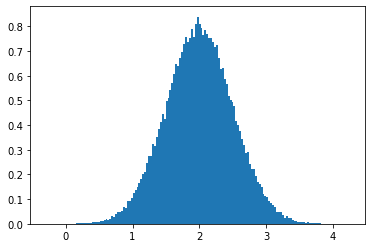

In [94]:
plt.hist(v,bins="auto",density=1)
plt.show()

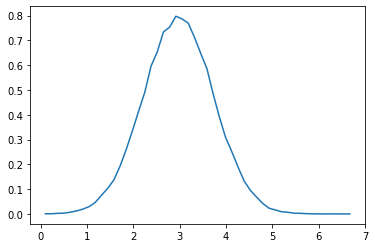

In [83]:
plt.plot(bins[:-1]+bins[1:]/2,n)# n은 50개 bins는 51개 
plt.show()

# 8절연습문제

## 8.1 실습형

In [95]:
import numpy as np
from sklearn import datasets
iris=datasets.load_iris()
iris_data=iris.data #독립변수
iris
iris_data
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [119]:
#1 각 변수별 평균을 출력하세요.
iris_data
iris_data.sum(axis=0)/len(iris_data)
#np.mean(iris_data,axis=0) #열별 평균

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [103]:
# 2번 처음 다섯개행을 출력하세요 
iris_data
iris_data[0:5,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [155]:
# 3번 처음 다섯개행에서 마지막 열을 제외한 나머지 열을 출력하세요 
ex3=iris_data[0:5,0:5] #iris_data[:5,:-1]
ex3


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [157]:
#4 처음 다섯개 행에서 마지막 열만 출력하세요ㅕ
ex4=iris_data[:5,-1]
ex4

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [158]:
#5 3번 배열과 4번 배열을 원래 보양이 되도록 합치세요.
#실행 결과는 2번의 결과와 같아야합니다.
np.c_[ex3,ex4]

array([[5.1, 3.5, 1.4, 0.2, 0.2],
       [4.9, 3. , 1.4, 0.2, 0.2],
       [4.7, 3.2, 1.3, 0.2, 0.2],
       [4.6, 3.1, 1.5, 0.2, 0.2],
       [5. , 3.6, 1.4, 0.2, 0.2]])

In [159]:
np.column_stack((ex3, ex4))

array([[5.1, 3.5, 1.4, 0.2, 0.2],
       [4.9, 3. , 1.4, 0.2, 0.2],
       [4.7, 3.2, 1.3, 0.2, 0.2],
       [4.6, 3.1, 1.5, 0.2, 0.2],
       [5. , 3.6, 1.4, 0.2, 0.2]])

In [160]:
np.hstack((ex3, ex4[:, np.newaxis]))

array([[5.1, 3.5, 1.4, 0.2, 0.2],
       [4.9, 3. , 1.4, 0.2, 0.2],
       [4.7, 3.2, 1.3, 0.2, 0.2],
       [4.6, 3.1, 1.5, 0.2, 0.2],
       [5. , 3.6, 1.4, 0.2, 0.2]])

In [161]:
#6 처음 다섯개 행을 이용해서 각 열별로 평균보다 큰 값들만 출력 
first_five=iris_data[0:5,]
mean=iris_data.sum(axis=0)/len(iris_data)
print(first_five)
print(mean)
print(first_five>mean)
first_five[first_five>mean]

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[5.84333333 3.05733333 3.758      1.19933333]
[[False  True False False]
 [False False False False]
 [False  True False False]
 [False  True False False]
 [False  True False False]]


array([3.5, 3.2, 3.1, 3.6])